# Sneak Peak

In [1122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [1123]:
url ='https://raw.githubusercontent.com/02advait/Case_Study_Housing_Linear/refs/heads/main/housing.csv'

In [1124]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Prevent line wrapping
pd.set_option('display.max_colwidth', None) # Show full column content (optional)

In [1125]:
df = pd.read_csv(url)

In [1126]:
df.shape

(21613, 21)

In [1127]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [1129]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [1130]:
df.dtypes

,0
id,int64
date,object
price,int64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [1131]:
df.isnull().mean() * 100

,0
id,0.0
date,0.0
price,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0


# Duplicates

In [1132]:
df['id'].duplicated().sum()

np.int64(177)

In [1133]:
df = df.drop_duplicates(subset='id', keep='first')

In [1134]:
df.shape

(21436, 21)

# Fix Data Type

In [1135]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1136]:
df.dtypes

,0
id,int64
date,object
price,int64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [1137]:
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

In [1138]:
df['yr_built'] = pd.to_datetime(df['yr_built'])


In [1139]:
df.drop('date', axis=1,inplace=True)


In [1140]:
df['bathrooms'] = df['bathrooms'].astype(int)


In [1141]:
df['floors'] = df['floors'].astype(int)


In [1142]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1970-01-01 00:00:00.000001955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1970-01-01 00:00:00.000001951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,1970-01-01 00:00:00.000001933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1970-01-01 00:00:00.000001965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1970-01-01 00:00:00.000001987,0,98074,47.6168,-122.045,1800,7503


In [1143]:
df.columns = df.columns.str.strip()


In [1144]:
df['yr_built'] = df['yr_built'].dt.date

In [1145]:
df.dtypes

,0
id,int64
price,int64
bedrooms,int64
bathrooms,int64
sqft_living,int64
sqft_lot,int64
floors,int64
waterfront,int64
view,int64
condition,int64


# Unique Data In Columns

In [1146]:
np.unique(df['condition'],return_counts=True)

(array([1, 2, 3, 4, 5]), array([   29,   164, 13911,  5645,  1687]))

In [1147]:
np.unique(df['grade'],return_counts=True)

(array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([   1,    3,   29,  234, 1995, 8896, 6044, 2606, 1130,  396,   89,
          13]))

In [1148]:
np.unique(df['yr_renovated'],return_counts=True)

(array([   0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954,
        1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967,
        1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
        1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
        1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015]),
 array([20526,     1,     2,     1,     3,     2,     1,     2,     1,
            3,     1,     3,     3,     3,     5,     1,     4,     2,
            4,     4,     5,     2,     8,     4,     9,     2,     4,
            5,     3,     6,     3,     8,     6,    10,    10,     5,
           11,    18,    17,    17,    17,    18,    15,    22,    24,
           20,    17,    19,    19,    16,    15,    15,    19,    17,
           35,    19,    22,    36,    26,    35,    24,    35,    18,
           22,    18,    

In [1149]:
df['renoveted_or_not'] = np.where(df['yr_renovated'] == 0, 0, 1)


In [1150]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renoveted_or_not
0,7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1970-01-01,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1970-01-01,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,1970-01-01,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1970-01-01,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1970-01-01,0,98074,47.6168,-122.045,1800,7503,0


In [1151]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))
    print('-' * 50)


Column: id
id
1523300157    1
7129300520    1
6414100192    1
5631500400    1
2487200875    1
             ..
1875500060    1
9297300055    1
1175000570    1
6054650070    1
114101516     1
Name: count, Length: 21436, dtype: int64
--------------------------------------------------

Column: price
price
350000    172
450000    171
550000    156
500000    151
425000    150
         ... 
274800      1
317750      1
569888      1
869950      1
389990      1
Name: count, Length: 4016, dtype: int64
--------------------------------------------------

Column: bedrooms
bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64
--------------------------------------------------

Column: bathrooms
bathrooms
2    10481
1     8254
3     2217
4      335
0       85
5       48
6       12
8        2
7        2
Name: count, dtype: int64
--------------------------------------------------

# Fix Outliers

In [1152]:
def fix_outlier(column,df=df):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


In [1153]:
df = fix_outlier('price')

In [1154]:
# Replace 0 bedrooms with 1
df['bedrooms'] = df['bedrooms'].replace(0, 1)

# Replace bedrooms > 6 with 6
df['bedrooms'] = df['bedrooms'].apply(lambda x: 6 if x > 6 else x)


In [1155]:
# Replace 0 bedrooms with 1
df['bathrooms'] = df['bathrooms'].replace(0, 1)

# Replace bedrooms > 4 with 4
df['bathrooms'] = df['bathrooms'].apply(lambda x: 4 if x > 4 else x)

In [1156]:
# Replace 0 grade with 1
df['grade'] = df['grade'].replace([1,3,4,5], 1)

# Replace 6 grade with 2
df['grade'] = df['grade'].replace(6, 2)

# Replace 7 grade with 3
df['grade'] = df['grade'].replace(7, 3)

# Replace 8 grade with 4
df['grade'] = df['grade'].replace(8, 4)

# Replace 9 grade with 5
df['grade'] = df['grade'].replace(9,5)

# Replace 10 grade with 6
df['grade'] = df['grade'].replace(10,6)

# Replace 11,12,13 grade with 7
df['grade'] = df['grade'].replace([11,12,13],7)

# Create Derived Fields

In [1157]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renoveted_or_not
0,7129300520,221900,3,1,1180,5650,1,0,0,3,3,1180,0,1970-01-01,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,538000,3,2,2570,7242,2,0,0,3,3,2170,400,1970-01-01,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,180000,2,1,770,10000,1,0,0,3,2,770,0,1970-01-01,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,604000,4,3,1960,5000,1,0,0,5,3,1050,910,1970-01-01,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,510000,3,2,1680,8080,1,0,0,3,4,1680,0,1970-01-01,0,98074,47.6168,-122.045,1800,7503,0


In [1158]:
df['Total_area'] = df['sqft_living'] + df['sqft_lot']

In [1159]:
df['extra_area'] = df['sqft_above']+ df['sqft_basement']

In [1160]:
df['neighbourhood_total_area_15'] =  df['sqft_living15'] + df['sqft_lot15']

In [1161]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renoveted_or_not,Total_area,extra_area,neighbourhood_total_area_15
0,7129300520,221900,3,1,1180,5650,1,0,0,3,3,1180,0,1970-01-01,0,98178,47.5112,-122.257,1340,5650,0,6830,1180,6990
1,6414100192,538000,3,2,2570,7242,2,0,0,3,3,2170,400,1970-01-01,1991,98125,47.7210,-122.319,1690,7639,1,9812,2570,9329
2,5631500400,180000,2,1,770,10000,1,0,0,3,2,770,0,1970-01-01,0,98028,47.7379,-122.233,2720,8062,0,10770,770,10782
3,2487200875,604000,4,3,1960,5000,1,0,0,5,3,1050,910,1970-01-01,0,98136,47.5208,-122.393,1360,5000,0,6960,1960,6360
4,1954400510,510000,3,2,1680,8080,1,0,0,3,4,1680,0,1970-01-01,0,98074,47.6168,-122.045,1800,7503,0,9760,1680,9303


# Univariate Analysis

In [1162]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renoveted_or_not,Total_area,extra_area,neighbourhood_total_area_15
0,7129300520,221900,3,1,1180,5650,1,0,0,3,3,1180,0,1970-01-01,0,98178,47.5112,-122.257,1340,5650,0,6830,1180,6990
1,6414100192,538000,3,2,2570,7242,2,0,0,3,3,2170,400,1970-01-01,1991,98125,47.7210,-122.319,1690,7639,1,9812,2570,9329
2,5631500400,180000,2,1,770,10000,1,0,0,3,2,770,0,1970-01-01,0,98028,47.7379,-122.233,2720,8062,0,10770,770,10782
3,2487200875,604000,4,3,1960,5000,1,0,0,5,3,1050,910,1970-01-01,0,98136,47.5208,-122.393,1360,5000,0,6960,1960,6360
4,1954400510,510000,3,2,1680,8080,1,0,0,3,4,1680,0,1970-01-01,0,98074,47.6168,-122.045,1800,7503,0,9760,1680,9303


In [1163]:
def bar_plot(column):
    # Show percentage
    print("Percentage distribution:")
    print(df[column].value_counts(normalize=True) * 100)
    print('-------------------------')

        # Show count
    print("\nCount distribution:")
    print(df[column].value_counts())
    print('---------------------')

        # Plot
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [1164]:
def histogram( column, bins=10, color='skyblue',df=df):
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=bins, color=color, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Percentage distribution:
bedrooms
3    45.395596
4    31.950924
2    12.763575
5     7.398768
6     1.525471
1     0.965665
Name: proportion, dtype: float64
-------------------------

Count distribution:
bedrooms
3    9731
4    6849
2    2736
5    1586
6     327
1     207
Name: count, dtype: int64
---------------------


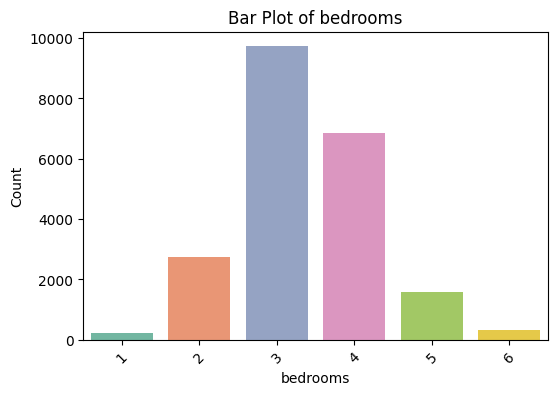

In [1165]:
bar_plot('bedrooms')

Percentage distribution:
bathrooms
2    48.894383
1    38.901847
3    10.342415
4     1.861355
Name: proportion, dtype: float64
-------------------------

Count distribution:
bathrooms
2    10481
1     8339
3     2217
4      399
Name: count, dtype: int64
---------------------


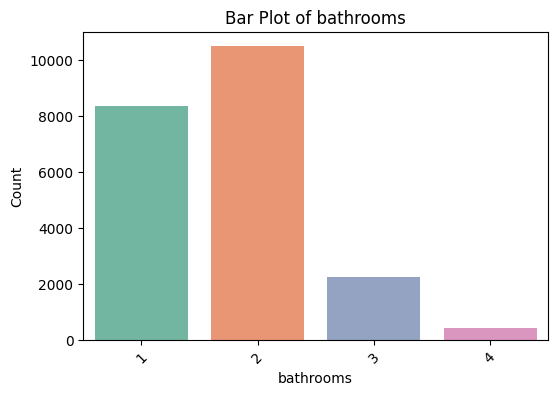

In [1166]:
bar_plot('bathrooms')

Percentage distribution:
floors
1    58.065870
2    39.046464
3     2.887666
Name: proportion, dtype: float64
-------------------------

Count distribution:
floors
1    12447
2     8370
3      619
Name: count, dtype: int64
---------------------


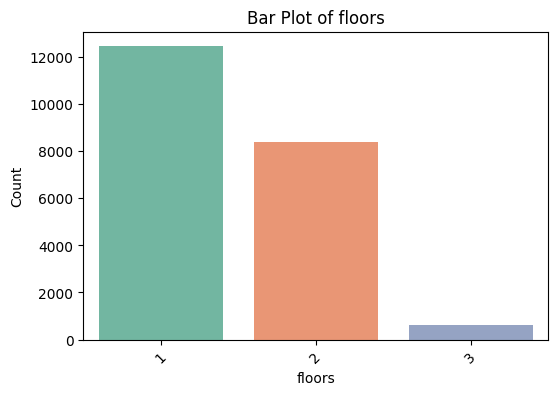

In [1167]:
bar_plot('floors')

Percentage distribution:
waterfront
0    99.239597
1     0.760403
Name: proportion, dtype: float64
-------------------------

Count distribution:
waterfront
0    21273
1      163
Name: count, dtype: int64
---------------------


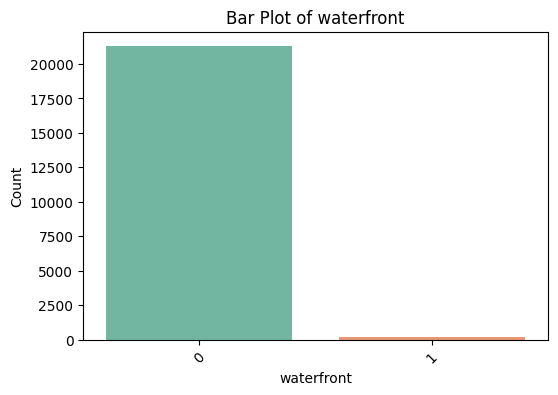

In [1168]:
bar_plot('waterfront')

Percentage distribution:
view
0    90.128755
2     4.487778
3     2.365180
1     1.544131
4     1.474156
Name: proportion, dtype: float64
-------------------------

Count distribution:
view
0    19320
2      962
3      507
1      331
4      316
Name: count, dtype: int64
---------------------


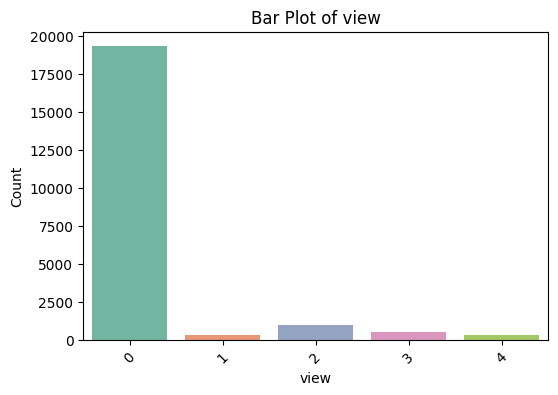

In [1169]:
bar_plot('view')

Percentage distribution:
grade
3    41.500280
4    28.195559
5    12.157119
2     9.306774
6     5.271506
7     2.323195
1     1.245568
Name: proportion, dtype: float64
-------------------------

Count distribution:
grade
3    8896
4    6044
5    2606
2    1995
6    1130
7     498
1     267
Name: count, dtype: int64
---------------------


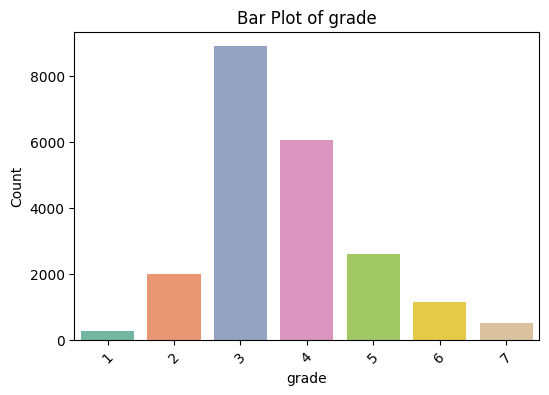

In [1170]:
bar_plot('grade')

Percentage distribution:
renoveted_or_not
0    95.754805
1     4.245195
Name: proportion, dtype: float64
-------------------------

Count distribution:
renoveted_or_not
0    20526
1      910
Name: count, dtype: int64
---------------------


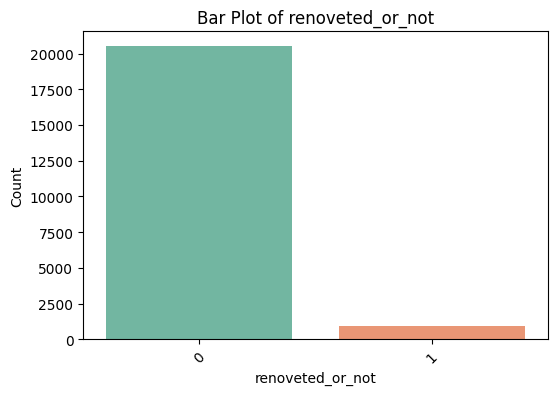

In [1171]:
bar_plot('renoveted_or_not')

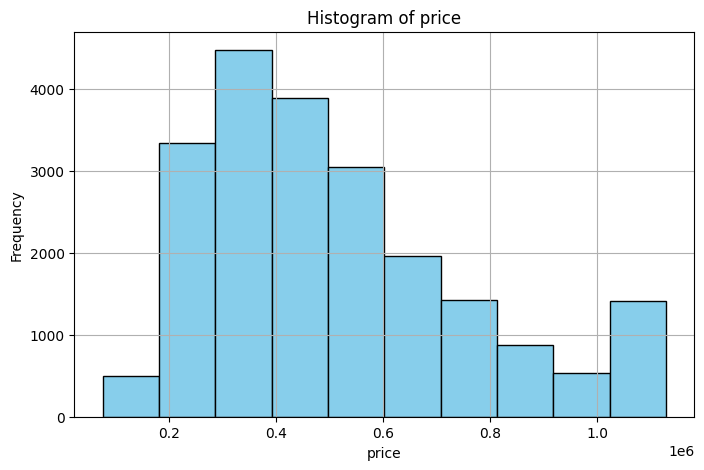

In [1172]:
histogram('price')

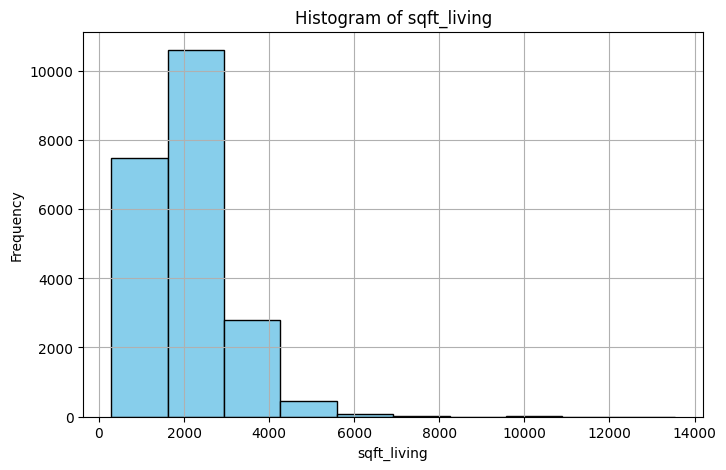

In [1173]:
histogram('sqft_living')

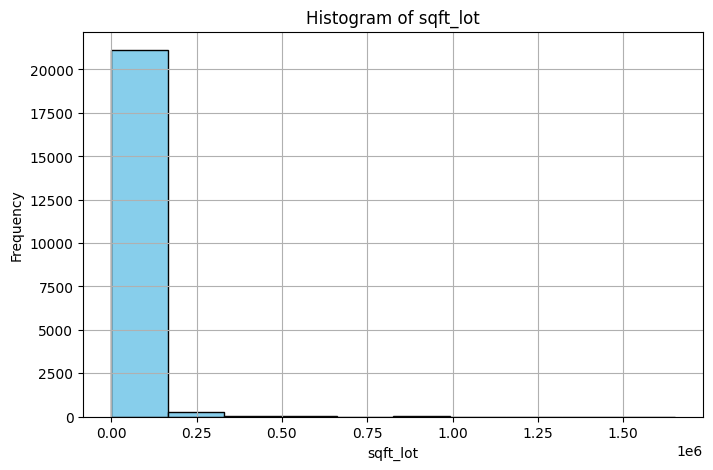

In [1174]:
histogram('sqft_lot')

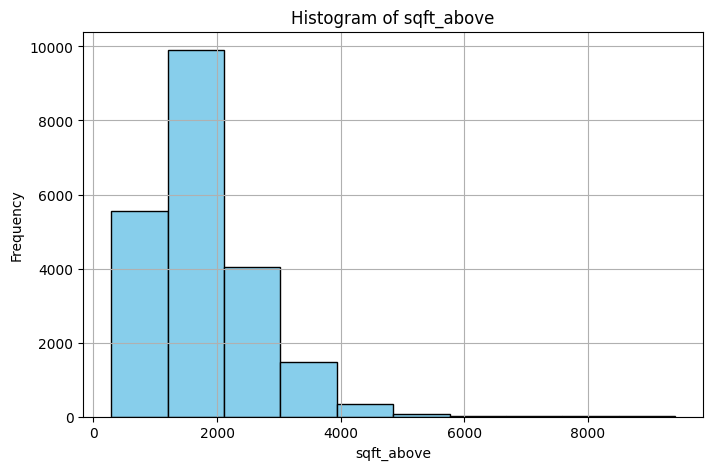

In [1175]:
histogram('sqft_above')

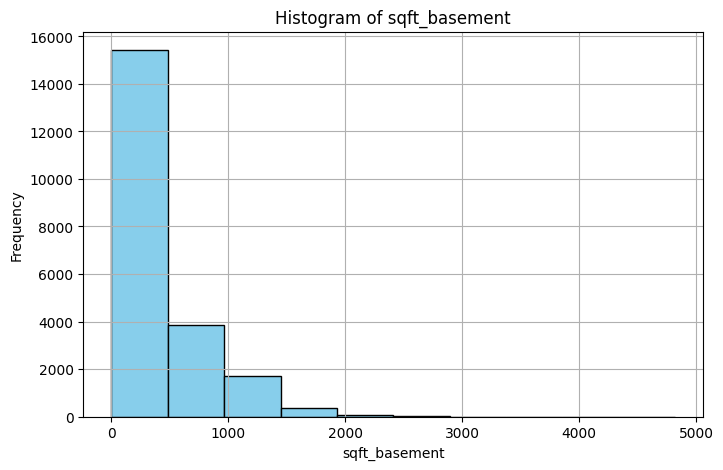

In [1176]:
histogram('sqft_basement')

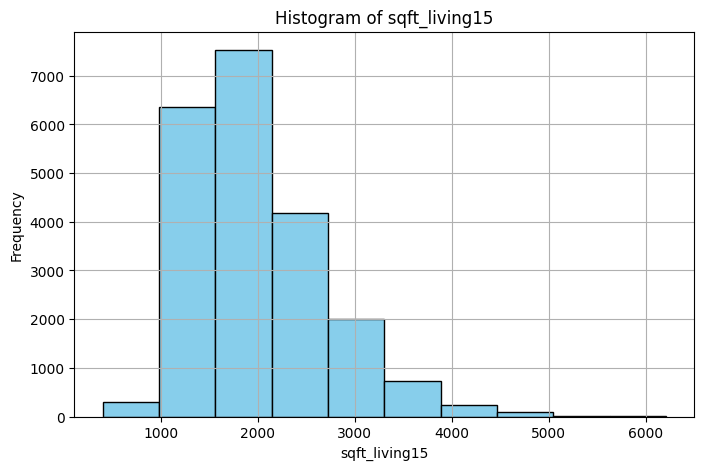

In [1177]:
histogram('sqft_living15')

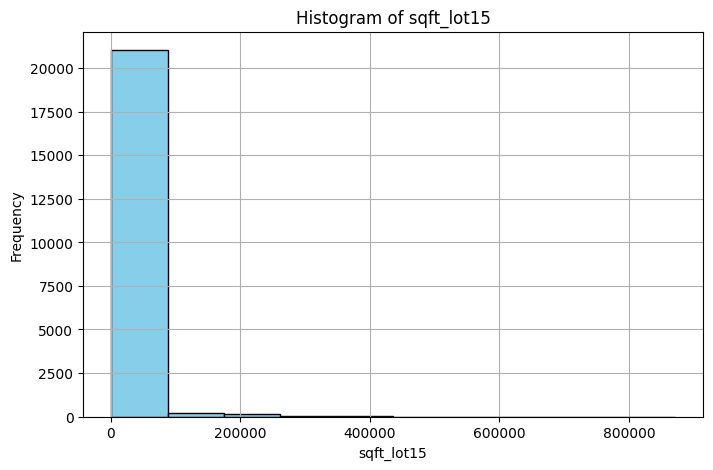

In [1178]:
histogram('sqft_lot15')

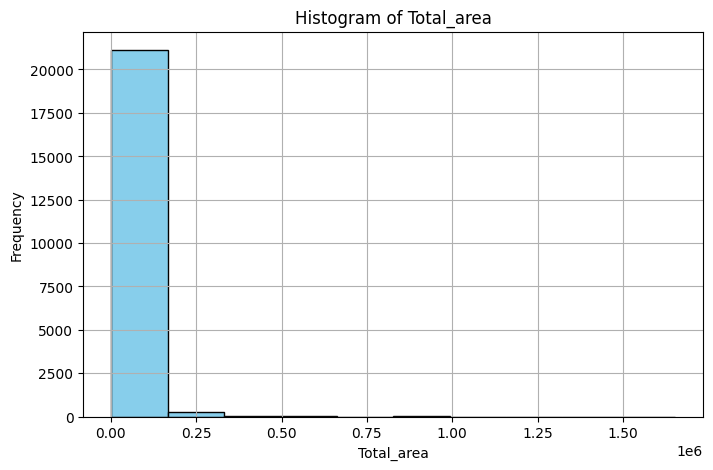

In [1179]:
histogram('Total_area')

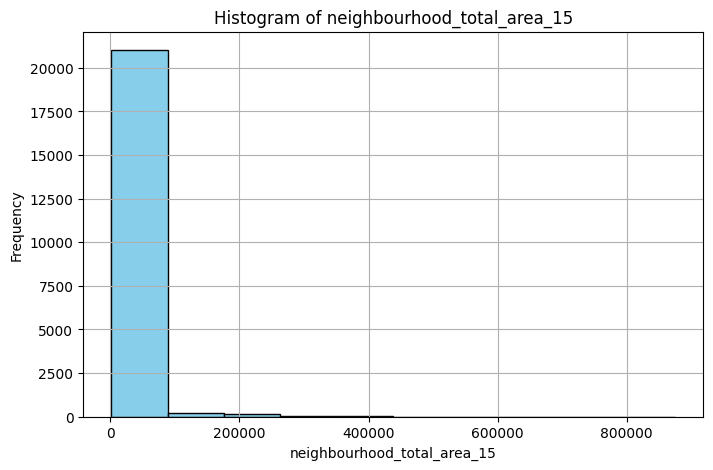

In [1180]:
histogram('neighbourhood_total_area_15')

# Bivariate Analysis

In [1181]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renoveted_or_not,Total_area,extra_area,neighbourhood_total_area_15
0,7129300520,221900,3,1,1180,5650,1,0,0,3,3,1180,0,1970-01-01,0,98178,47.5112,-122.257,1340,5650,0,6830,1180,6990
1,6414100192,538000,3,2,2570,7242,2,0,0,3,3,2170,400,1970-01-01,1991,98125,47.7210,-122.319,1690,7639,1,9812,2570,9329
2,5631500400,180000,2,1,770,10000,1,0,0,3,2,770,0,1970-01-01,0,98028,47.7379,-122.233,2720,8062,0,10770,770,10782
3,2487200875,604000,4,3,1960,5000,1,0,0,5,3,1050,910,1970-01-01,0,98136,47.5208,-122.393,1360,5000,0,6960,1960,6360
4,1954400510,510000,3,2,1680,8080,1,0,0,3,4,1680,0,1970-01-01,0,98074,47.6168,-122.045,1800,7503,0,9760,1680,9303


Text(0.5, 1.0, 'bedrooms vs price')

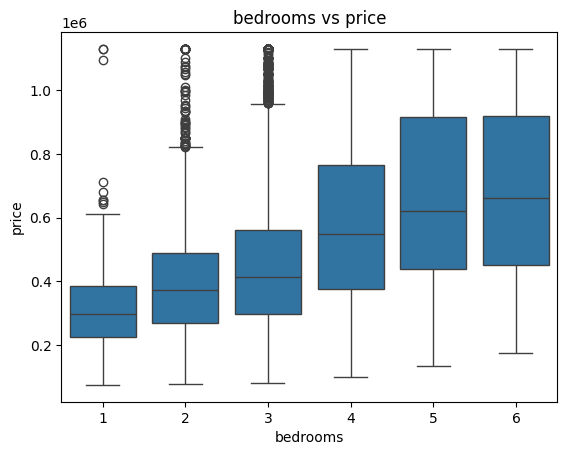

In [1182]:
x = 'bedrooms'
target = 'price'
sns.boxplot(data=df, x=x, y=target)
plt.title(f'{x} vs {target}')

Text(0.5, 1.0, 'renoveted_or_not vs price')

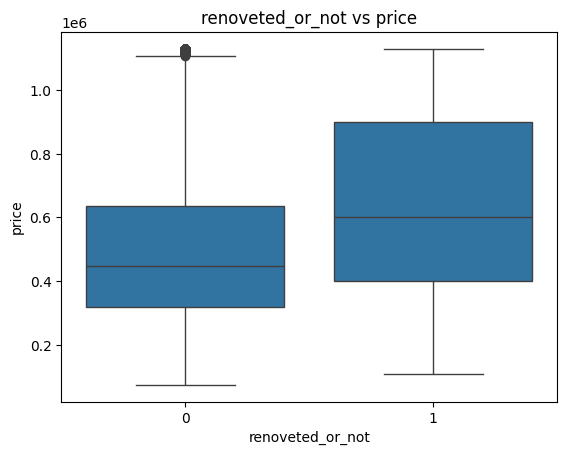

In [1183]:
x = 'renoveted_or_not'
target = 'price'
sns.boxplot(data=df, x=x, y=target)
plt.title(f'{x} vs {target}')

Text(0.5, 1.0, 'grade vs price')

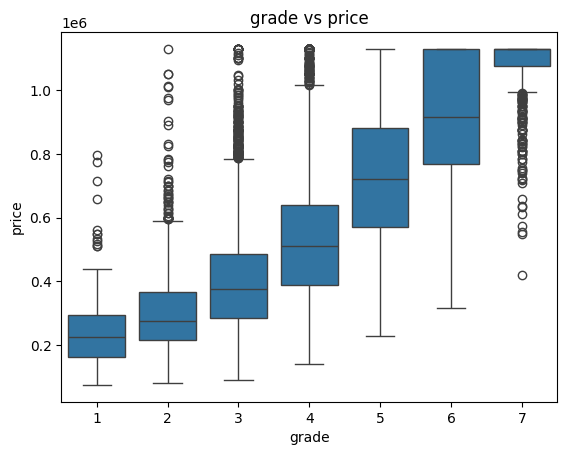

In [1184]:
x = 'grade'
target = 'price'
sns.boxplot(data=df, x=x, y=target)
plt.title(f'{x} vs {target}')

Text(0.5, 1.0, 'condition vs price')

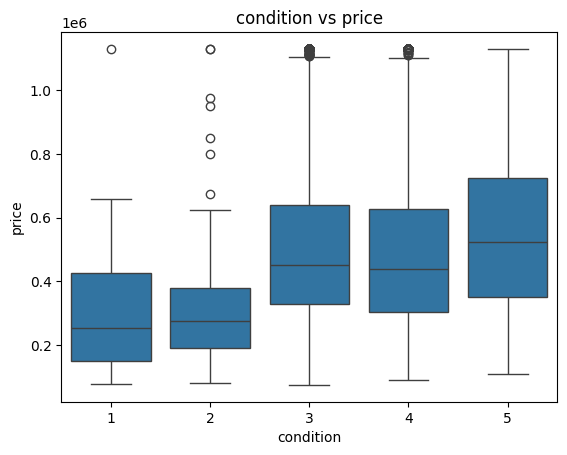

In [1185]:
x = 'condition'
target = 'price'
sns.boxplot(data=df, x=x, y=target)
plt.title(f'{x} vs {target}')

Text(0.5, 1.0, 'view vs price')

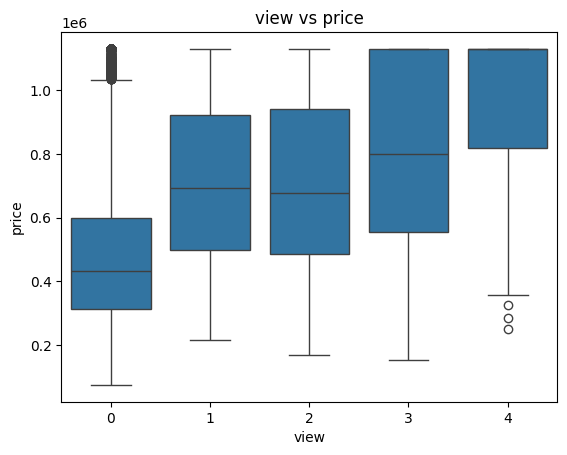

In [1186]:
x = 'view'
target = 'price'
sns.boxplot(data=df, x=x, y=target)
plt.title(f'{x} vs {target}')

Text(0.5, 1.0, 'view vs price')

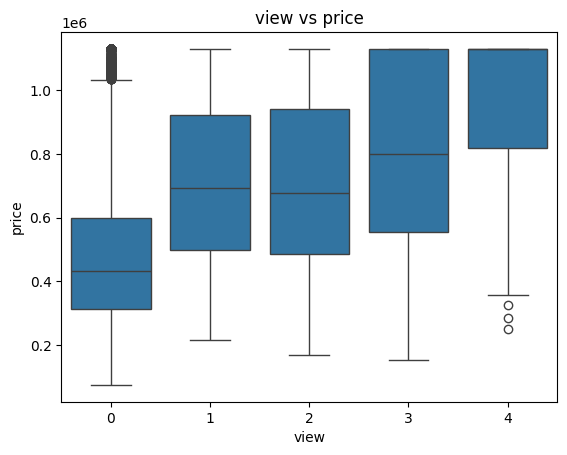

In [1187]:
x = 'view'
target = 'price'
sns.boxplot(data=df, x=x, y=target)
plt.title(f'{x} vs {target}')

Text(0.5, 1.0, 'waterfront vs price')

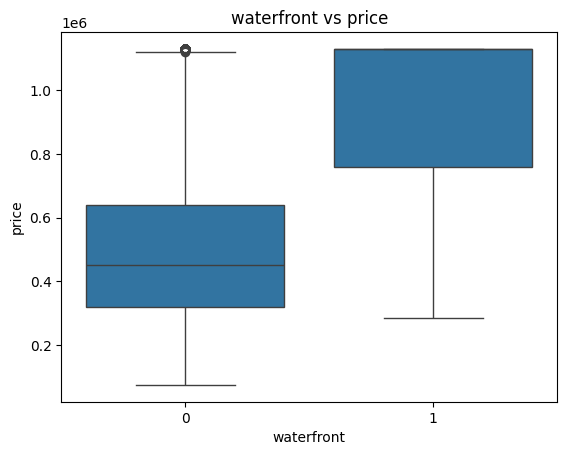

In [1188]:
x = 'waterfront'
target = 'price'
sns.boxplot(data=df, x=x, y=target)
plt.title(f'{x} vs {target}')

Text(0.5, 1.0, 'floors vs price')

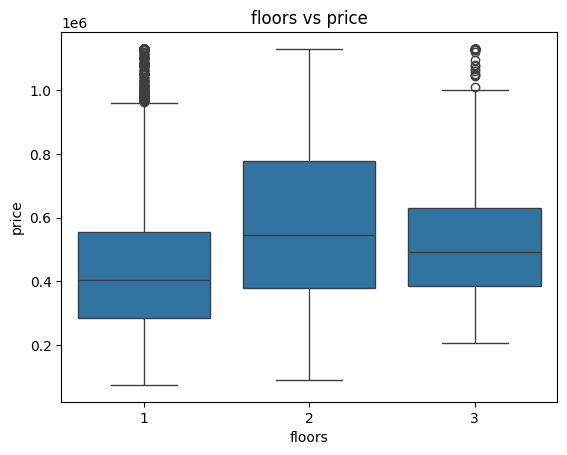

In [1189]:
x = 'floors'
target = 'price'
sns.boxplot(data=df, x=x, y=target)
plt.title(f'{x} vs {target}')

Text(0.5, 1.0, 'bathrooms vs price')

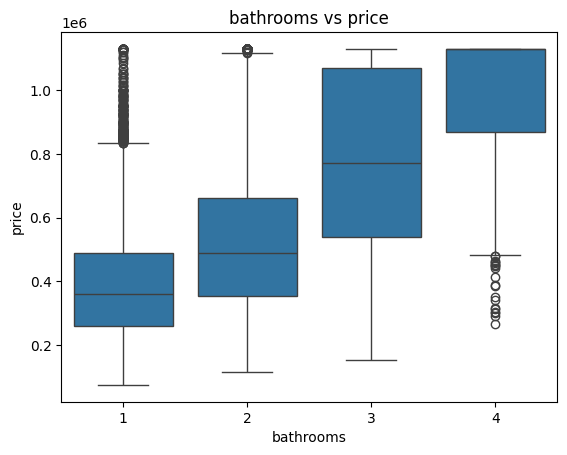

In [1190]:
x = 'bathrooms'
target = 'price'
sns.boxplot(data=df, x=x, y=target)
plt.title(f'{x} vs {target}')

In [1191]:

def scatter( x_col, y_col='price', color='blue', size=50,df=df):

    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_col], df[y_col], color=color, s=size, alpha=0.7, edgecolors='k')
    plt.title(f'Scatter Plot: {y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()


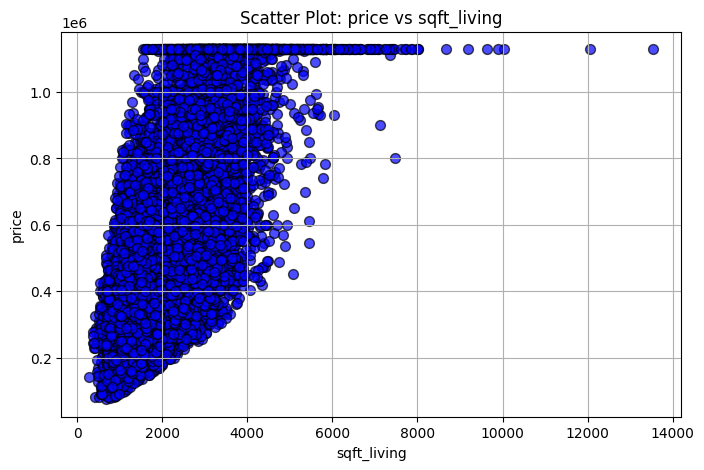

In [1192]:
scatter('sqft_living')

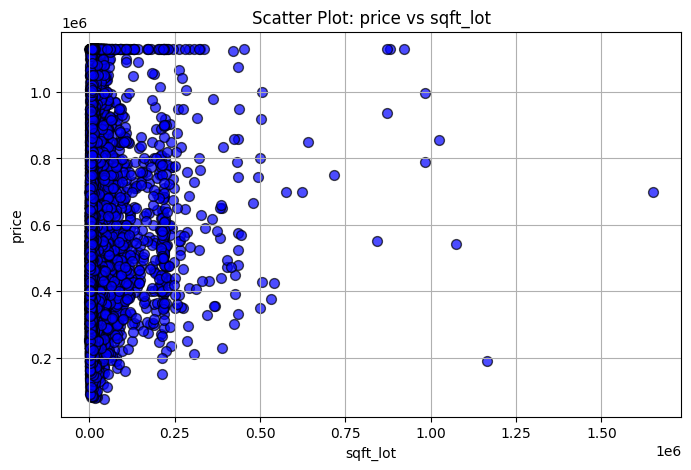

In [1193]:
scatter('sqft_lot')

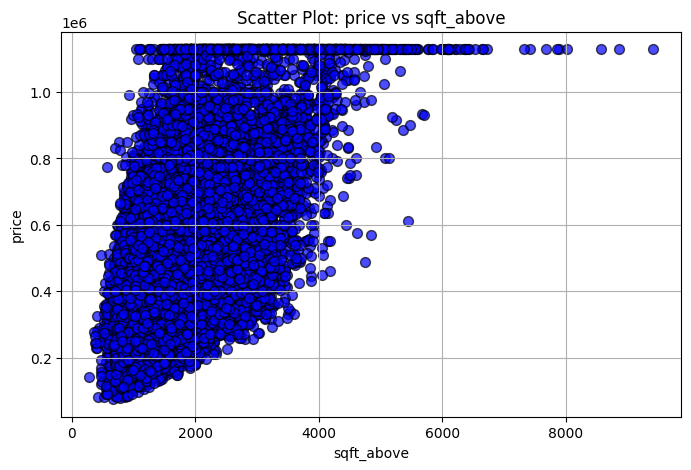

In [1194]:
scatter('sqft_above')

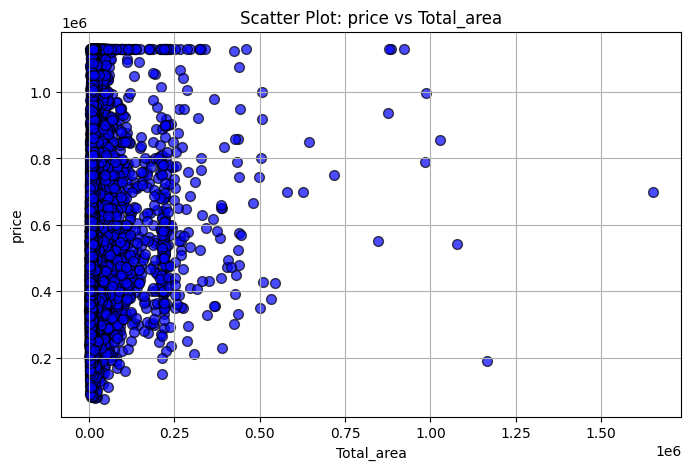

In [1195]:
scatter('Total_area')

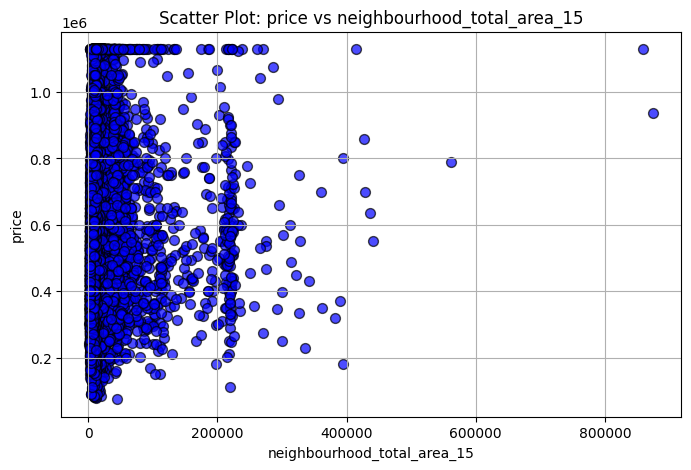

In [1196]:
scatter('neighbourhood_total_area_15')

# Multivariate Analysis

In [1197]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renoveted_or_not,Total_area,extra_area,neighbourhood_total_area_15
0,7129300520,221900,3,1,1180,5650,1,0,0,3,3,1180,0,1970-01-01,0,98178,47.5112,-122.257,1340,5650,0,6830,1180,6990
1,6414100192,538000,3,2,2570,7242,2,0,0,3,3,2170,400,1970-01-01,1991,98125,47.7210,-122.319,1690,7639,1,9812,2570,9329
2,5631500400,180000,2,1,770,10000,1,0,0,3,2,770,0,1970-01-01,0,98028,47.7379,-122.233,2720,8062,0,10770,770,10782
3,2487200875,604000,4,3,1960,5000,1,0,0,5,3,1050,910,1970-01-01,0,98136,47.5208,-122.393,1360,5000,0,6960,1960,6360
4,1954400510,510000,3,2,1680,8080,1,0,0,3,4,1680,0,1970-01-01,0,98074,47.6168,-122.045,1800,7503,0,9760,1680,9303


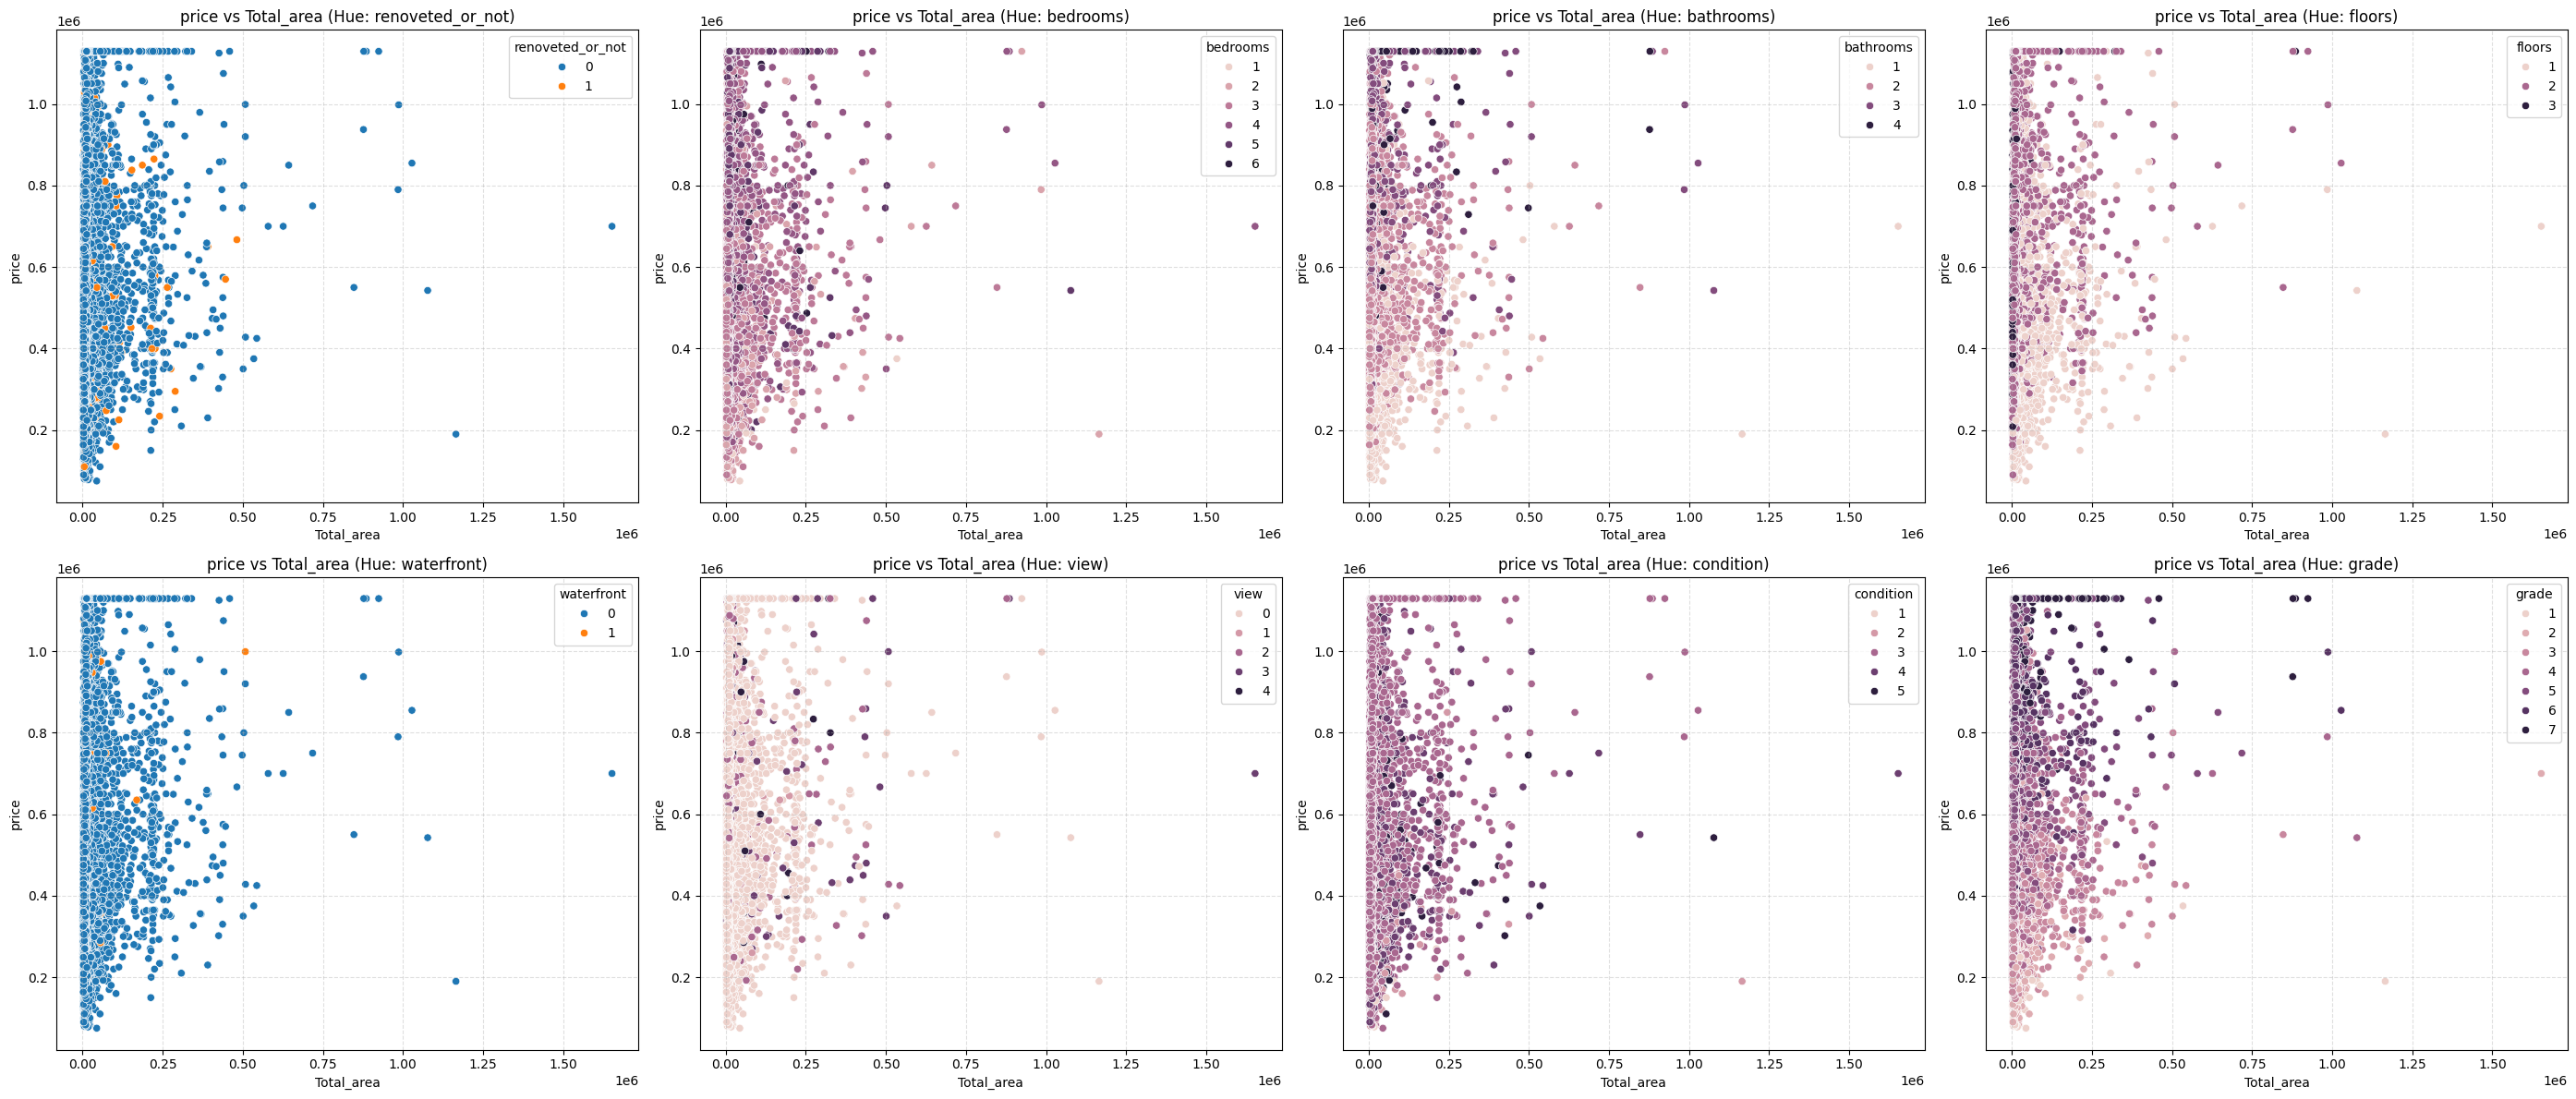

In [1198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up 2×4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(28, 12))

# Plot 1: Hue = renoveted_or_not
sns.scatterplot(data=df, x='Total_area', y='price', hue='renoveted_or_not', ax=axes[0, 0])
axes[0, 0].set_title('price vs Total_area (Hue: renoveted_or_not)')

# Plot 2: Hue = bedrooms
sns.scatterplot(data=df, x='Total_area', y='price', hue='bedrooms', ax=axes[0, 1])
axes[0, 1].set_title('price vs Total_area (Hue: bedrooms)')

# Plot 3: Hue = bathrooms
sns.scatterplot(data=df, x='Total_area', y='price', hue='bathrooms', ax=axes[0, 2])
axes[0, 2].set_title('price vs Total_area (Hue: bathrooms)')

# Plot 4: Hue = floors
sns.scatterplot(data=df, x='Total_area', y='price', hue='floors', ax=axes[0, 3])
axes[0, 3].set_title('price vs Total_area (Hue: floors)')

# Plot 5: Hue = waterfront
sns.scatterplot(data=df, x='Total_area', y='price', hue='waterfront', ax=axes[1, 0])
axes[1, 0].set_title('price vs Total_area (Hue: waterfront)')

# Plot 6: Hue = view
sns.scatterplot(data=df, x='Total_area', y='price', hue='view', ax=axes[1, 1])
axes[1, 1].set_title('price vs Total_area (Hue: view)')

# Plot 7: Hue = condition
sns.scatterplot(data=df, x='Total_area', y='price', hue='condition', ax=axes[1, 2])
axes[1, 2].set_title('price vs Total_area (Hue: condition)')

# Plot 8: Hue = grade
sns.scatterplot(data=df, x='Total_area', y='price', hue='grade', ax=axes[1, 3])
axes[1, 3].set_title('price vs Total_area (Hue: grade)')

# Optional: Grid and layout
for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


# Drop unnessary columns

In [1199]:
# Assume X contains only numeric, non-target, non-categorical variables
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['price'], errors='ignore')  # drop target

# Add constant column for intercept
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)

# Create DataFrame for VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i + 1) for i in range(X.shape[1])]  # i+1 to skip constant

vif_data['VIF'] = vif_data['VIF'].round(2)
vif_data

,Feature,VIF
0,id,1.03
1,bedrooms,1.68
2,bathrooms,2.29
3,sqft_living,inf
4,sqft_lot,inf
5,floors,1.89
6,waterfront,1.21
7,view,1.43
8,condition,1.14
9,grade,3.18


In [1200]:
df.drop('id', axis=1, inplace=True)

In [1201]:
df.drop('lat', axis=1, inplace=True)

In [1202]:
df.drop('long', axis=1, inplace=True)

In [1203]:
df.drop('zipcode', axis=1, inplace=True)

In [1204]:
df.drop('sqft_living15', axis=1, inplace=True)

In [1205]:
df.drop('sqft_lot15', axis=1, inplace=True)

In [1206]:
df.drop('yr_renovated', axis=1, inplace=True)

In [1207]:
df.drop('sqft_basement', axis=1, inplace=True)

In [1208]:
df.drop('sqft_living', axis=1, inplace=True)

In [1209]:
df.drop('sqft_lot', axis=1, inplace=True)

# Multi-colinearity using VIF

In [1211]:
# Assume X contains only numeric, non-target, non-categorical variables
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['price'], errors='ignore')  # drop target

# Add constant column for intercept
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)

# Create DataFrame for VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i + 1) for i in range(X.shape[1])]  # i+1 to skip constant

vif_data['VIF'] = vif_data['VIF'].round(2)
vif_data

,Feature,VIF
0,bedrooms,1.67
1,bathrooms,2.28
2,floors,1.85
3,waterfront,1.20
4,view,1.36
5,condition,1.13
6,grade,2.82
7,sqft_above,6.03
8,renoveted_or_not,1.03
9,Total_area,2.09


# corelation matrix

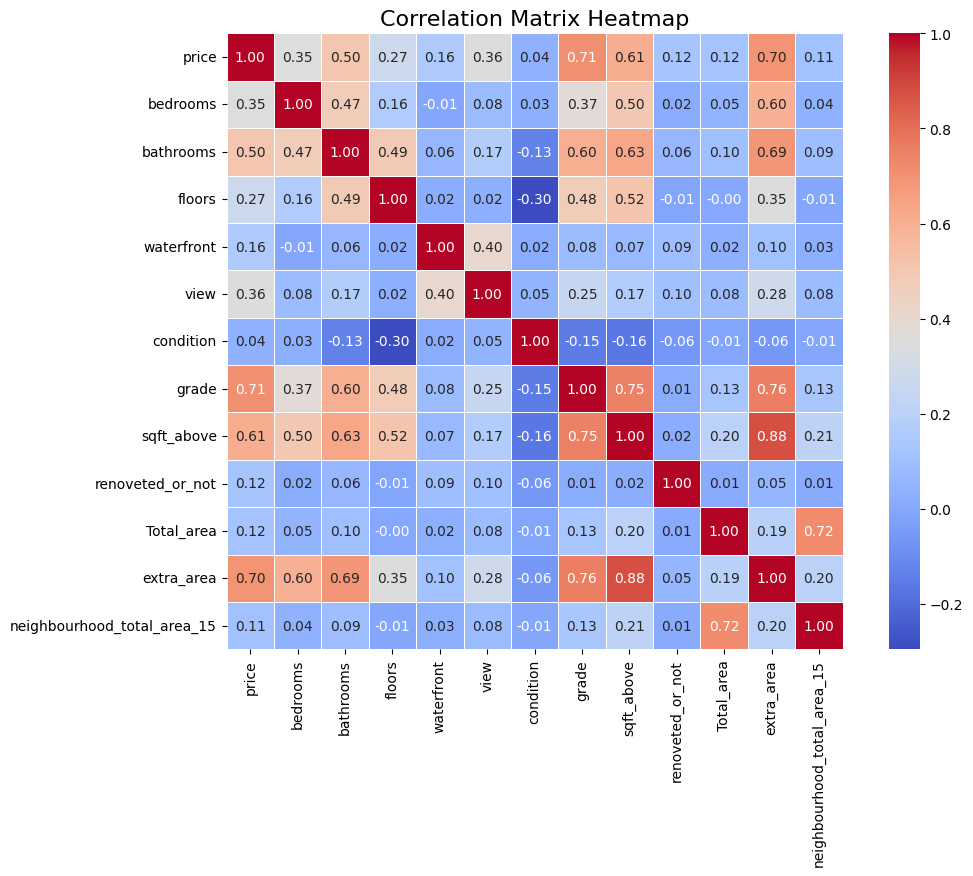

In [1212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Title and display
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


# Infrential Statics

In [1213]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'renoveted_or_not',
       'Total_area', 'extra_area', 'neighbourhood_total_area_15'],
      dtype='object')

In [1214]:
# What influences price the most?
# Do houses with more bedroom tend to have higher price ?
# How does no of bathroom differs price ?
# Do houses on higher floors have high price ?
# Does price diffrentiate between waterfront or not ?
# Is view related to change in price ?
# How does condition of house affects price ?
# How does grade of house affects price ?
# Does area above house has any relation with price fluction
# does renovation helps in change in price
# How does total area affects price
# Having basement and area above affects change in price
# Does houses in neighbourhood affects pricing of house

In [1215]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.weightstats import ztest
from scipy.stats import pearsonr


In [1216]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,yr_built,renoveted_or_not,Total_area,extra_area,neighbourhood_total_area_15
0,221900,3,1,1,0,0,3,3,1180,1970-01-01,0,6830,1180,6990
1,538000,3,2,2,0,0,3,3,2170,1970-01-01,1,9812,2570,9329
2,180000,2,1,1,0,0,3,2,770,1970-01-01,0,10770,770,10782
3,604000,4,3,1,0,0,5,3,1050,1970-01-01,0,6960,1960,6360
4,510000,3,2,1,0,0,3,4,1680,1970-01-01,0,9760,1680,9303


## What influences price the most

In [1217]:
# Compute correlation matrix (numeric only)
correlations = df.corr(numeric_only=True)

# Extract correlation of all features with target column (e.g., 'price')
target_corr = correlations['price'].drop('price')  # Drop self-correlation

# Sort by correlation (optional)
target_corr_sorted = target_corr.sort_values(ascending=False)

# Display result
print(target_corr_sorted)


grade                          0.707375
extra_area                     0.695223
sqft_above                     0.606837
bathrooms                      0.503833
view                           0.355690
bedrooms                       0.350556
floors                         0.274057
waterfront                     0.156324
renoveted_or_not               0.122270
Total_area                     0.115905
neighbourhood_total_area_15    0.107353
condition                      0.040566
Name: price, dtype: float64


In [1218]:
print('Factors that affects price most are (Top 5):- ')
print('  1. Grade        -->  0.70  ')
print('  2. Extra area   -->  0.69  ')
print('  3. Sqft above   -->  0.60  ')
print('  4. Bathrooms    -->  0.50  ')
print('  5. View         -->  0.35  ')

Factors that affects price most are (Top 5):- 
  1. Grade        -->  0.70  
  2. Extra area   -->  0.69  
  3. Sqft above   -->  0.60  
  4. Bathrooms    -->  0.50  
  5. View         -->  0.35  


## Do houses with more bedroom tend to have higher price


In [1219]:
# Ho = no of bedroom does not affect house price
# Ha = no of bedroom affects house price

In [1220]:
np.unique(df.bedrooms,return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([ 207, 2736, 9731, 6849, 1586,  327]))

In [1221]:
# One way ANOVA
print(pairwise_tukeyhsd(endog=df.price,groups=df.bedrooms))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     1      2   75924.031 0.0001  28008.2873 123839.7747   True
     1      3 134075.3077    0.0  87386.5941 180764.0214   True
     1      4 273395.9341    0.0   226503.06 320288.8082   True
     1      5 354513.6111    0.0 305391.1969 403636.0252   True
     1      6 373318.7577    0.0 314279.9061 432357.6093   True
     2      3  58151.2767    0.0  43767.5799  72534.9734   True
     2      4 197471.9031    0.0 182438.7268 212505.0793   True
     2      5   278589.58    0.0 257611.8223 299567.3377   True
     2      6 297394.7267    0.0 258502.0443  336287.409   True
     3      4 139320.6264    0.0 128836.6444 149804.6083   True
     3      5 220438.3033    0.0 202438.7532 238437.8535   True
     3      6   239243.45    0.0  201872.897  276614.003   True
     4      5   81117.677    0.0  62595.

In [1222]:
# -------------------------------

## How does no of bathroom differs price

In [1223]:
# Ho = No of bathroom does not affect house price
# Ha = No of bathroom affects house price

In [1224]:
np.unique(df.bathrooms,return_counts=True)

(array([1, 2, 3, 4]), array([ 8339, 10481,  2217,   399]))

In [1225]:
# One way ANOVA
print(pairwise_tukeyhsd(endog=df.price,groups=df.bathrooms))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     1      2 137108.9936   0.0 129017.1006 145200.8866   True
     1      3 375643.6609   0.0 362466.9042 388820.4176   True
     1      4 583351.3687   0.0 555092.0781 611610.6593   True
     2      3 238534.6673   0.0 225643.8004 251425.5343   True
     2      4 446242.3752   0.0 418115.2523  474369.498   True
     3      4 207707.7078   0.0 177719.6565 237695.7592   True
--------------------------------------------------------------


In [1226]:
print('We reject the null hypothesis')
print('No of bathroom affects house price')

We reject the null hypothesis
No of bathroom affects house price


## Do houses on higher floors have high price


In [1227]:
np.unique(df.floors,return_counts=True)

(array([1, 2, 3]), array([12447,  8370,   619]))

In [1228]:
# Ho = No of floors does not affect house price
# Ha = No of floors affects house price

In [1229]:
# One way ANOVA
print(pairwise_tukeyhsd(endog=df.price,groups=df.floors))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     1      2 154210.2081   0.0 146303.1201 162117.2961   True
     1      3 103378.8136   0.0  80343.3885 126414.2388   True
     2      3 -50831.3945   0.0 -74131.0881 -27531.7008   True
--------------------------------------------------------------


In [1230]:
print('We reject the null hypothesis')
print('No of floors affects house')

We reject the null hypothesis
No of floors affects house


## Does price diffrentiate between waterfront or not ?

In [1231]:
np.unique(df.waterfront,return_counts=True)

(array([0, 1]), array([21273,   163]))

In [1232]:
# Ho = waterfront does not affect price
# Ha = waterfront affects price

In [1233]:
water = df[df['waterfront'] == 1]['price']
no_water = df[df['waterfront'] == 0]['price']

In [1234]:
# 2 sample t test / 2 sample z-test
ztest(water,no_water,value=0,alternative='two-sided')

(np.float64(23.171268956103187), np.float64(8.874794389770131e-119))

In [1235]:
print('Since p-value < 0.05, we reject the null hypothesis.')

Since p-value < 0.05, we reject the null hypothesis.


## Is view related to change in price ?

In [1236]:
np.unique(df.view,return_counts=True)

(array([0, 1, 2, 3, 4]), array([19320,   331,   962,   507,   316]))

In [1237]:
# Ho = change in voew does not affects price
# Ha = change in view affcts price

In [1238]:
# One Way Anova
print(pairwise_tukeyhsd(endog=df.price,groups=df.view))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1 229975.7346    0.0 194695.7508 265255.7185   True
     0      2 223405.5542    0.0 202381.4307 244429.6778   True
     0      3 323896.4514    0.0 295262.9426 352529.9602   True
     0      4 480081.0795    0.0 443987.2454 516174.9135   True
     1      2  -6570.1804 0.9921 -47125.8276  33985.4669  False
     1      3  93920.7168    0.0  48947.1181 138894.3155   True
     1      4 250105.3449    0.0 200050.2591 300160.4306   True
     2      3 100490.8972    0.0  65562.9558 135418.8386   True
     2      4 256675.5252    0.0 215409.9449 297941.1056   True
     3      4 156184.6281    0.0  110569.804 201799.4521   True
---------------------------------------------------------------


In [1239]:
print('--------------')

--------------


## How does condition of house affects price ?

In [1240]:
np.unique(df.condition,return_counts=True)

(array([1, 2, 3, 4, 5]), array([   29,   164, 13911,  5645,  1687]))

In [1241]:
# Ho = condition does not affect price
# Ha = condition affects price

In [1242]:
# One Way ANOVA
print(pairwise_tukeyhsd(endog=df.price,groups=df.condition))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     1      2  -2298.8265    1.0 -139029.542 134431.8889  False
     1      3 196477.0269 0.0002  70305.4394 322648.6144   True
     1      4 178268.1156 0.0011  51904.4986 304631.7325   True
     1      5 249541.2675    0.0 122422.2709 376660.2641   True
     2      3 198775.8534    0.0 145463.0577 252088.6491   True
     2      4 180566.9421    0.0 126801.2618 234332.6225   True
     2      5  251840.094    0.0 196322.3131  307357.875   True
     3      4 -18208.9113    0.0 -28920.0889  -7497.7337   True
     3      5  53064.2406    0.0  35565.5281  70562.9531   True
     4      5  71273.1519    0.0  52439.6939  90106.6099   True
---------------------------------------------------------------


In [1243]:
print('--------------')

--------------


## How does grade of house affects price ?

In [1244]:
np.unique(df.grade,return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]),
 array([ 267, 1995, 8896, 6044, 2606, 1130,  498]))

In [1245]:
# Ho = condition does not affect price
# Ha = condition affects price

In [1246]:
# One Way ANOVA
print(pairwise_tukeyhsd(endog=df.price,groups=df.grade))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     1      2   58557.541   0.0  25047.5681  92067.5139   True
     1      3 158643.3663   0.0 126704.4128 190582.3198   True
     1      4 294462.0978   0.0 262304.3157 326619.8799   True
     1      5 493624.4849   0.0 460581.4572 526667.5125   True
     1      6 668838.3388   0.0 633847.1895 703829.4881   True
     1      7 830415.7101   0.0   791411.16 869420.2601   True
     2      3 100085.8253   0.0  87347.2781 112824.3724   True
     2      4 235904.5568   0.0 222626.8769 249182.2366   True
     2      5 435066.9438   0.0 419769.3785 450364.5092   True
     2      6 610280.7978   0.0 591135.1883 629426.4073   True
     2      7 771858.1691   0.0 746099.1171  797617.221   True
     3      4 135818.7315   0.0 127246.9609 144390.5021   True
     3      5 334981.1186   0.0 323527.1247 346435.1124

## Does area above house has any relation with price fluction ?

In [1247]:
# Ho = square ft above has no relation with price
# Ha = square ft above has relation with price

In [1248]:
# 2 sample z test

# Create two groups based on median
median_sqft = df['sqft_above'].median()
group_low = df[df['sqft_above'] <= median_sqft]['price']
group_high = df[df['sqft_above'] > median_sqft]['price']

In [1249]:
z_stat, p_val = ztest(group_high, group_low, value=0, alternative='two-sided')

In [1250]:
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Z-statistic: 74.4963
P-value: 0.0000


In [1251]:
print('p-value = 0 < 0.05')
print('We reject null hypothesis')

p-value = 0 < 0.05
We reject null hypothesis


## does renovation helps in change in price ?

In [1252]:
# Ho = renovation does not affect price
# Ha = renovation affects price

In [1253]:
# Create two groups based on median

rev_0 = df[df['renoveted_or_not'] == 0]['price']
rev_1 = df[df['renoveted_or_not'] == 1]['price']

# 2 sample x test
z_stat, p_val = ztest(rev_1, rev_0, value=0, alternative='two-sided')

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Z-statistic: 18.0361
P-value: 0.0000


In [1254]:
print('p-value = 0 < 0.05')
print('We reject null hypothesis')

p-value = 0 < 0.05
We reject null hypothesis


## How does total area affects price

In [1255]:
# Ho = Total_area does not affect price
# Ha = Total_area affects price

In [1256]:
r, p = pearsonr(df['Total_area'], df['price'])

print(f"Correlation Coefficient: {r:.4f}")
print(f"P-value: {p:.4e}")

Correlation Coefficient: 0.1159
P-value: 5.2619e-65


In [1257]:
print('p-value = 0.0000 < 0.05')
print('We reject null hypothesis')

p-value = 0.0000 < 0.05
We reject null hypothesis


## Having basement and area above affects change in price

In [1258]:
# Ho = extra_area does not affect price
# Ha = extra_area affects price

In [1259]:
r, p = pearsonr(df['extra_area'], df['price'])

print(f"Correlation Coefficient: {r:.4f}")
print(f"P-value: {p:.4e}")

Correlation Coefficient: 0.6952
P-value: 0.0000e+00


In [1260]:
print('p-value = 0.0000 < 0.05')
print('We reject null hypothesis')

p-value = 0.0000 < 0.05
We reject null hypothesis


## Does houses in neighbourhood affects pricing of house

In [1261]:
# Ho = neighbourhood_total_area_15 does not affect price
# Ha = neighbourhood_total_area_15 affects price

In [1262]:
r, p = pearsonr(df['neighbourhood_total_area_15'], df['price'])

print(f"Correlation Coefficient: {r:.4f}")
print(f"P-value: {p:.4e}")

Correlation Coefficient: 0.1074
P-value: 5.6557e-56


In [1263]:
print('p-value = 0.0000 < 0.05')
print('We reject null hypothesis')

p-value = 0.0000 < 0.05
We reject null hypothesis


# Making model

In [1264]:
url = 'https://raw.githubusercontent.com/02advait/Case_Study_Housing_Linear/refs/heads/main/cleaned_data.csv'

In [1265]:
df1 = pd.read_csv(url)

In [1266]:
df1.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,yr_built,renoveted_or_not,Total_area,extra_area,neighbourhood_total_area_15
0,221900,3,1,1,0,0,3,3,1180,1970-01-01,0,6830,1180,6990
1,538000,3,2,2,0,0,3,3,2170,1970-01-01,1,9812,2570,9329
2,180000,2,1,1,0,0,3,2,770,1970-01-01,0,10770,770,10782
3,604000,4,3,1,0,0,5,3,1050,1970-01-01,0,6960,1960,6360
4,510000,3,2,1,0,0,3,4,1680,1970-01-01,0,9760,1680,9303


In [1267]:
# Drop un-necessary columns

df1=df1.drop('yr_built',axis=1)

In [1268]:
# Dummy for Bedroom

bed_dummy = pd.get_dummies(df1['bedrooms'],drop_first=True,prefix='Bedroom').astype(int)
df1= df1.drop('bedrooms', axis=1)
df1 = pd.concat([df1,bed_dummy], axis=1)

In [1269]:
# Dummy for bathrooms

bath_dummy = pd.get_dummies(df1['bathrooms'],drop_first=True,prefix='Bathroom').astype(int)
df1= df1.drop('bathrooms', axis=1)
df1 = pd.concat([df1,bath_dummy], axis=1)

In [1270]:
# Dummy for floors

floor_dummy = pd.get_dummies(df1['floors'],drop_first=True,prefix='Floors').astype(int)
df1 = df1.drop('floors', axis=1)
df1 = pd.concat([df1,floor_dummy], axis=1)

In [1271]:
# Dummy for waterfront

waterfront_dummy = pd.get_dummies(df1['waterfront'],drop_first=True,prefix='WaterFront').astype(int)
df1 = df1.drop('waterfront', axis=1)
df1 = pd.concat([df1,waterfront_dummy], axis=1)

In [1272]:
# Dummy for view

view_dummy = pd.get_dummies(df1['view'],drop_first=True,prefix='View').astype(int)
df1 = df1.drop('view', axis=1)
df1 = pd.concat([df1,view_dummy], axis=1)

In [1273]:
# Dummy for condition

condition_dummy = pd.get_dummies(df1['condition'],drop_first=True,prefix='Condition').astype(int)
df1= df1.drop('condition', axis=1)
df1 = pd.concat([df1,condition_dummy], axis=1)

In [1274]:
# Dummy for grade

grade_dummy = pd.get_dummies(df1['grade'],drop_first=True,prefix='Grade').astype(int)
df1 = df1.drop('grade', axis=1)
df1 = pd.concat([df1,grade_dummy], axis=1)

In [1275]:
# Dummy for renoveted_or_not

ren_dummy = pd.get_dummies(df1['renoveted_or_not'],drop_first=True,prefix='Renovate').astype(int)
df1 = df1.drop('renoveted_or_not', axis=1)
df1 = pd.concat([df1,ren_dummy], axis=1)

In [1276]:
df1.head()

,price,sqft_above,Total_area,extra_area,neighbourhood_total_area_15,Bedroom_2,Bedroom_3,Bedroom_4,Bedroom_5,Bedroom_6,Bathroom_2,Bathroom_3,Bathroom_4,Floors_2,Floors_3,WaterFront_1,View_1,View_2,View_3,View_4,Condition_2,Condition_3,Condition_4,Condition_5,Grade_2,Grade_3,Grade_4,Grade_5,Grade_6,Grade_7,Renovate_1
0,221900,1180,6830,1180,6990,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,538000,2170,9812,2570,9329,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,180000,770,10770,770,10782,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,604000,1050,6960,1960,6360,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,510000,1680,9760,1680,9303,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [1277]:
df1.shape

(21436, 31)

In [1278]:
# Test / Train / Splot

x_train, x_test, y_train, y_test = train_test_split(df1.drop('price',axis=1), df1.price, test_size=0.2, random_state=20)

In [1279]:
x_train1 = sm.add_constant(x_train,prepend=False)

In [1280]:
mod3 = sm.OLS(y_train,x_train1).fit()

In [1281]:
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     951.8
Date:                Sun, 15 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:29:32   Log-Likelihood:            -2.2904e+05
No. Observations:               17148   AIC:                         4.581e+05
Df Residuals:                   17117   BIC:                         4.584e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
sqft_above        